In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline #for encoding
from sklearn.preprocessing import LabelEncoder #for train test splitting
from sklearn.model_selection import train_test_split #for decision tree object
from sklearn.tree import DecisionTreeClassifier #for checking testing results
from sklearn.metrics import classification_report, confusion_matrix #for visualizing tree 
from sklearn.tree import plot_tree
from sklearn import tree

In [3]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/input_data.csv")
df.head()


,LineNumber,MissingBraces,SyntaticToken,ManhattanDistance,Classifier
0,1,0.00,0.22,0.22,CF
1,2,0.00,0.11,0.11,INS
2,3,0.25,0.00,0.25,COMP
3,4,0.25,0.00,0.25,COMP
4,5,0.00,0.55,0.55,COMP


In [5]:
#getting information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   LineNumber          6 non-null      int64  
 1   MissingBraces       6 non-null      float64
 2   SyntaticToken       6 non-null      float64
 3   ManhattanDistance   6 non-null      float64
 4   Classifier          6 non-null      object 
dtypes: float64(3), int64(1), object(1)
memory usage: 368.0+ bytes


In [6]:
df.shape

(6, 5)

In [7]:
df.isnull().any()

LineNumber            False
MissingBraces         False
SyntaticToken         False
ManhattanDistance     False
Classifier            False
dtype: bool

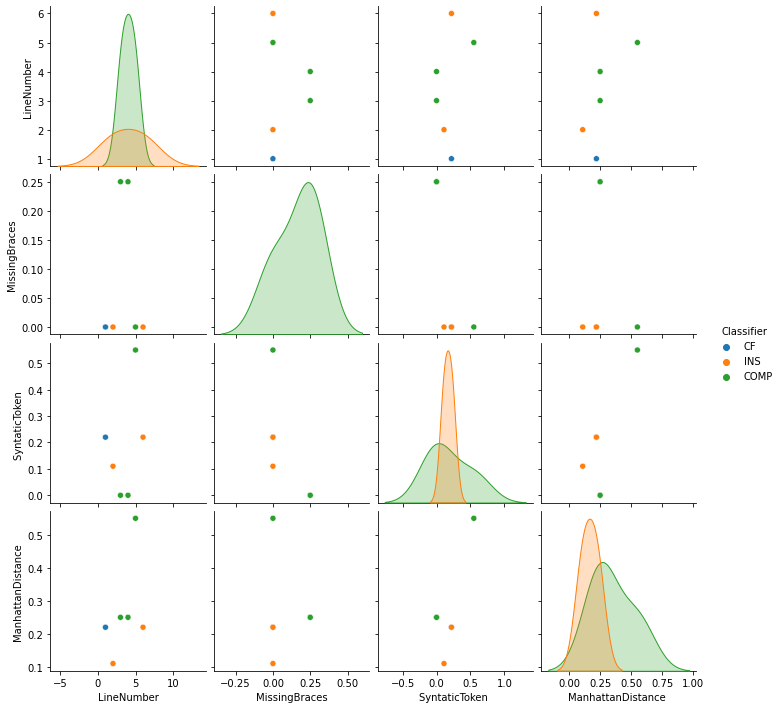

In [8]:
# let's plot pair plot to visualise the attributes all at once
sns.pairplot(data=df, hue = 'Classifier')

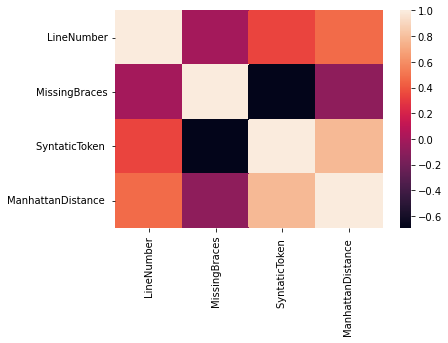

In [9]:
# correlation matrix
sns.heatmap(df.corr())

In [10]:
#Data Preprocessing
#Now, we will separate the target variable(y) and features(X) as follows
target = df['Classifier']
df1 = df.copy()
df1 = df1.drop('Classifier', axis =1)

In [11]:
# Defining the attributes
X = df1

In [12]:
target

0      CF
1     INS
2    COMP
3    COMP
4    COMP
5     INS
Name: Classifier, dtype: object

In [13]:
#label encoding
le = LabelEncoder()
target = le.fit_transform(target)
target

array([0, 2, 1, 1, 1, 2])

In [14]:
y = target

In [69]:
# Splitting the data - 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size = 0.2, random_state = 8)
print("Training split input- ", X_train.shape)
print("Testing split input- ", X_test.shape)

Training split input-  (4, 4)
Testing split input-  (2, 4)


In [70]:
# Defining the decision tree algorithmdtree=DecisionTreeClassifier()
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
print('Decision Tree Classifier Created')

Decision Tree Classifier Created


In [71]:
# Predicting the values of test data
y_pred = dtree.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         0

    accuracy                           0.50         2
   macro avg       0.33      0.33      0.33         2
weighted avg       0.50      0.50      0.50         2



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

Text(0.5, 1.0, 'Accuracy Score: 0.5')

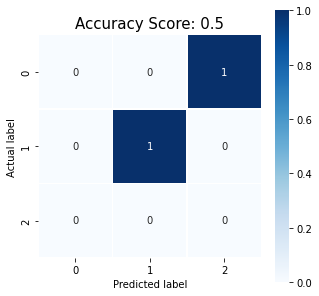

In [72]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(dtree.score(X_test, y_test))
plt.title(all_sample_title, size = 15)

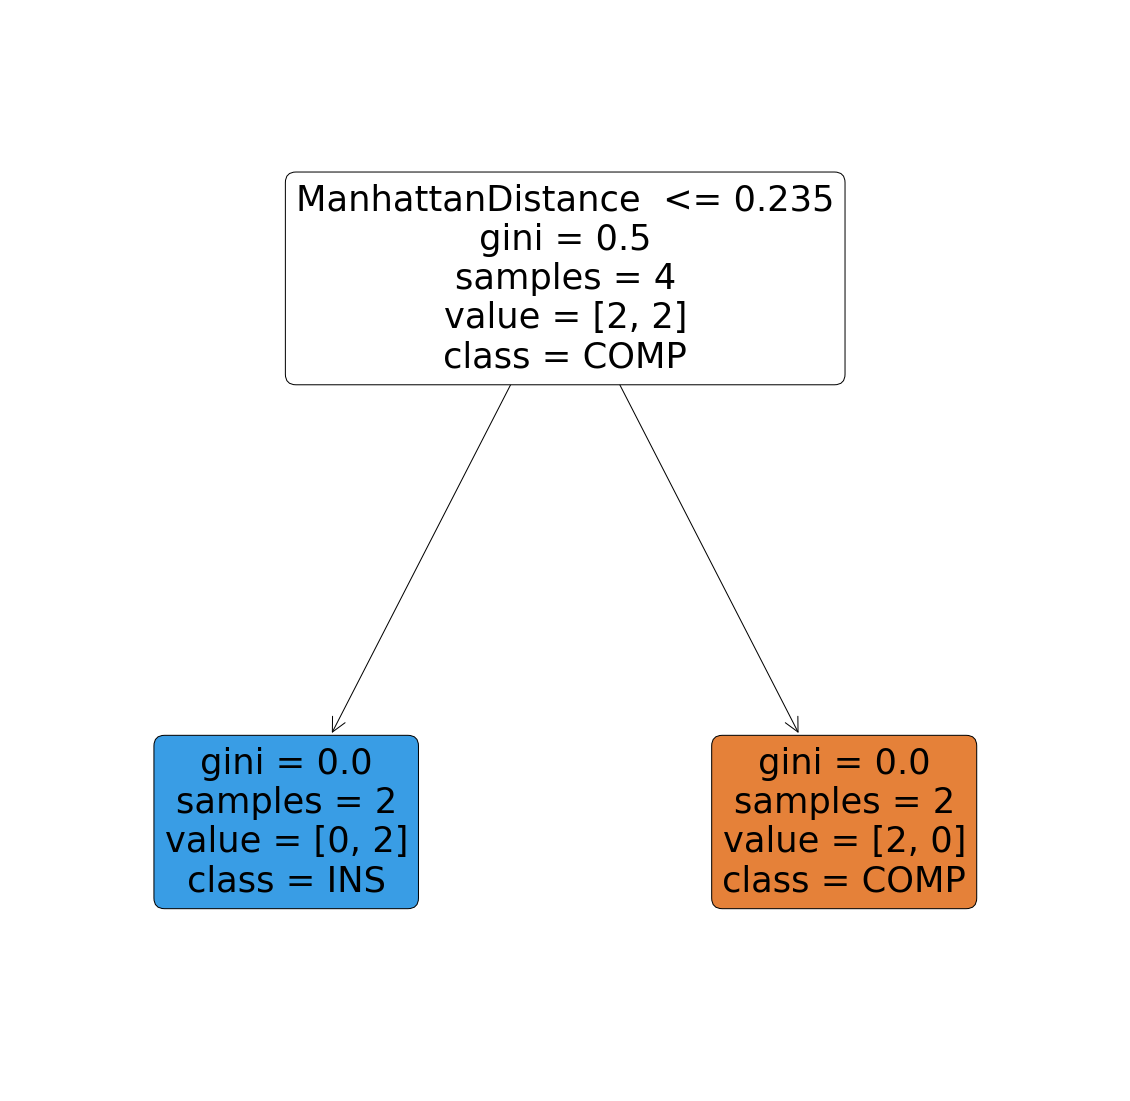

In [74]:
# Visualising the graph
plt.figure(figsize=(20,20))
dec_tree = plot_tree(decision_tree=dtree, feature_names = df1.columns, 
                     class_names =["COMP","INS","CF"] , filled = True , precision = 4, rounded = True)
